## Part 2 : Feature Engineering
### 1) Exploratory Data Analysis

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/xc2418/final_proj/data/flat_data.csv')

/home/xc2418/ENTER/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,29,38,41,42,43,46,47,65,66,67,72,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### (1)  Target Vriable -- totals_transactionRevenue

Since we need to predict the natural log of each 'fullVisitorId''s total revenue, let's add a column y (y = log(totals_transactionRevenue)) to our dataset.

In [7]:
# when we log(y), NANs change to 0
y = df['totals_transactionRevenue'].fillna(1, inplace = False) 
df['y'] = np.log(y)

In [8]:
# fill NANs with 0 (since NANs means no purchase in our data)
df['totals_transactionRevenue'].fillna(0, inplace = True)

revenue = df.groupby('fullVisitorId')['totals_transactionRevenue'].sum()
r = sum(revenue > 0)/len(revenue)
r

0.02408

The propotion of customers who purchased is only 2.4% in our sample.

#### (2) Derive Features from 'date'
In order to make full use of ‘date’ column, we derived 4 new columns from it: ‘year’, ‘month’, ‘week’, ‘weekday’, which is the year, month, specific week during the year(from 1 to 52), and the day of the week(from 0 to 6). 

In [3]:
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')
# get new year feature
df['year'] = df['date'].dt.year
# get new month feature
df['month'] = df['date'].dt.month
# get new week feature 
df['week'] = df['date'].dt.week
# get new weekday feature 
df['weekday'] = df['date'].dt.weekday
# drop 'date'
del(df['date'])

In [4]:
df.to_csv("/home/xc2418/final_proj/data/cleaned.csv", header = True, index = False)  

#### (3) Explore some important Variables 

For an important feature, we want to explore its relationship to our target variable('totals_transactionRevenue').
In order to show the relationship, we'll define a functions to show 4 plots: <br>
    (1) a count of how many times a category show up in a certain feature. <br>
    (2) a count of how many times a category show up in a certain feature when revenue > 0. <br>
    (3) the total revenue of a category make in a certain feature. <br>
    (4) the mean revenue of a category make in a certain feature. 

In [3]:
def count_all(col, df = df, n_bars = 10, figsize = (30, 10), fontsize = 20, fontsize_l = 20):
    rev = df['totals_transactionRevenue']
    
    # 4 values
    count = df[col].value_counts(normalize = True)
    count_r = df[col].where(rev > 0).value_counts(normalize = True)
    total_r = df.groupby(col)['totals_transactionRevenue'].sum()
    mean_r = total_r/count_r
    
    # normalize
    total_rev = rev.sum()
    total_r = total_r/rev.sum()
    
    mean_r.fillna(0, inplace = True)
    mean_r = mean_r/(mean_r.sum())
    
    # concat to dataframe
    name = ['count', 'count (revenue>0)', 'total', 'mean']
    data = pd.concat([count, count_r, total_r, mean_r], axis = 1)
    data.columns = name
    
    data.sort_values(by = 'count', ascending = False, inplace = True)
    
    data.head(n_bars).plot(kind = 'bar', figsize = figsize, fontsize = fontsize)
    plt.legend(fontsize = fontsize_l)
    plt.show()

##### (1) device

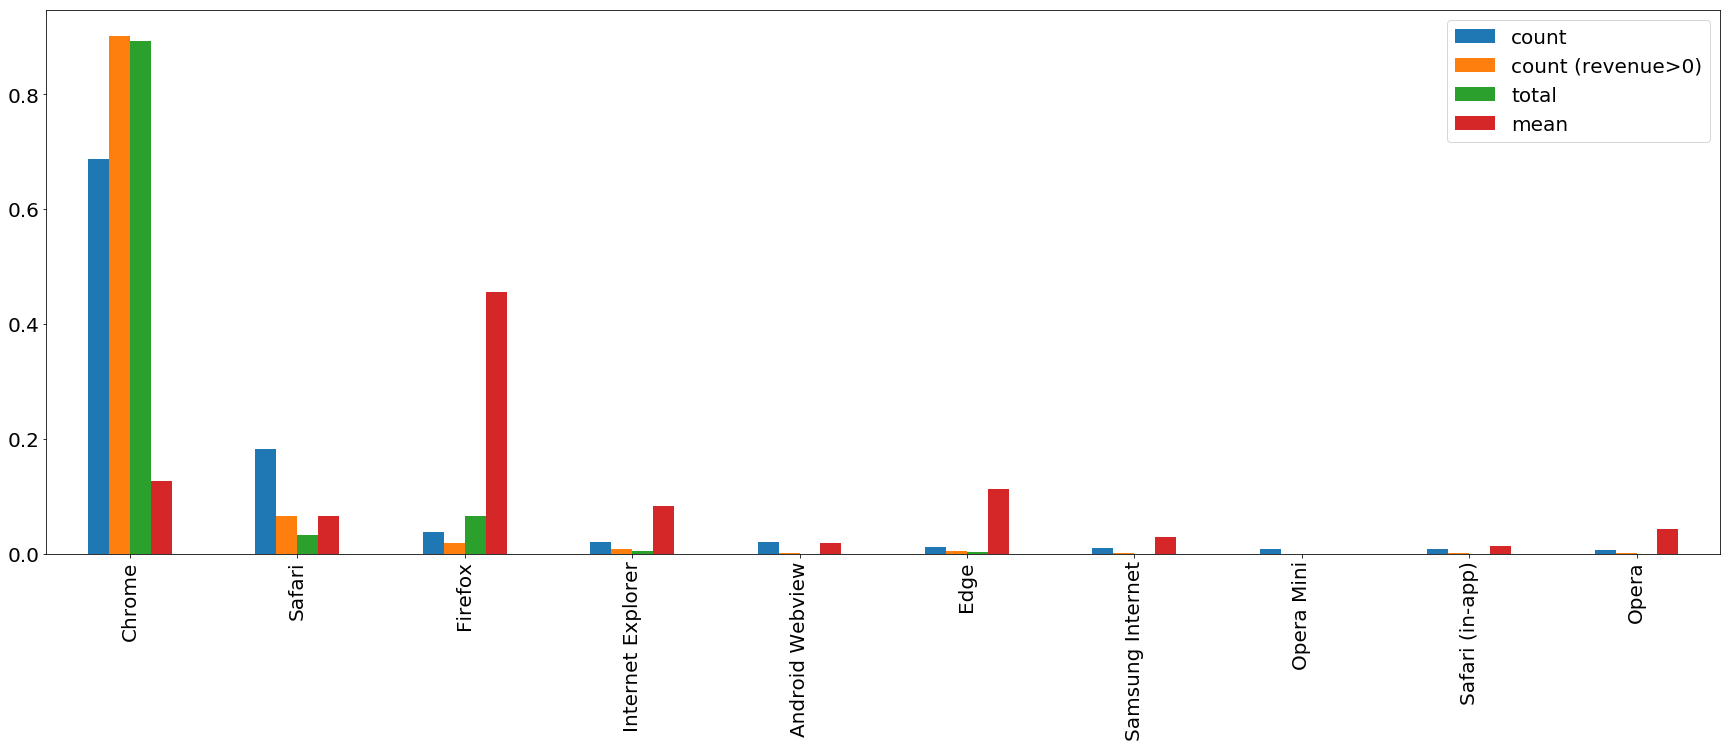

In [4]:
# device_browser
count_all('device_browser')

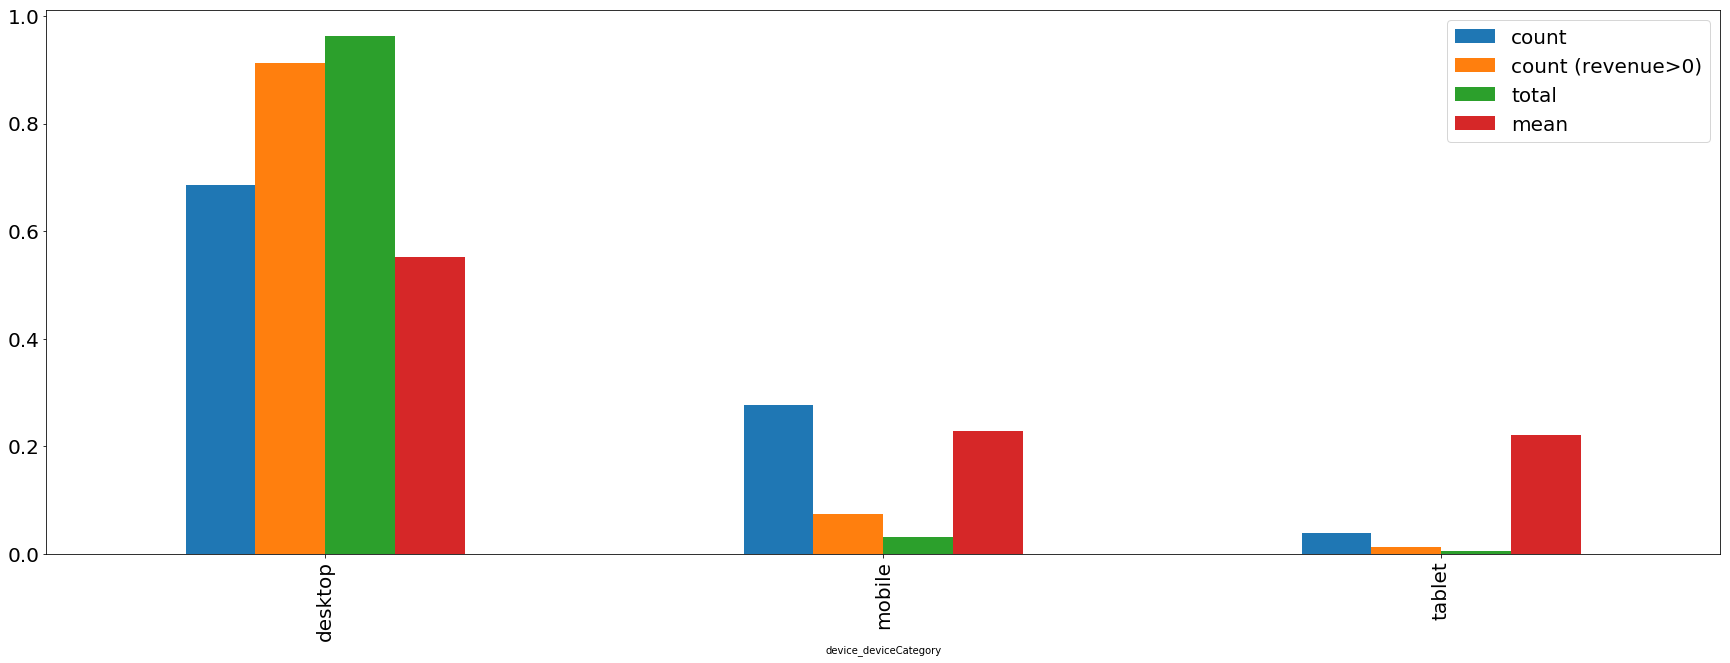

In [6]:
# device_category
count_all('device_deviceCategory')

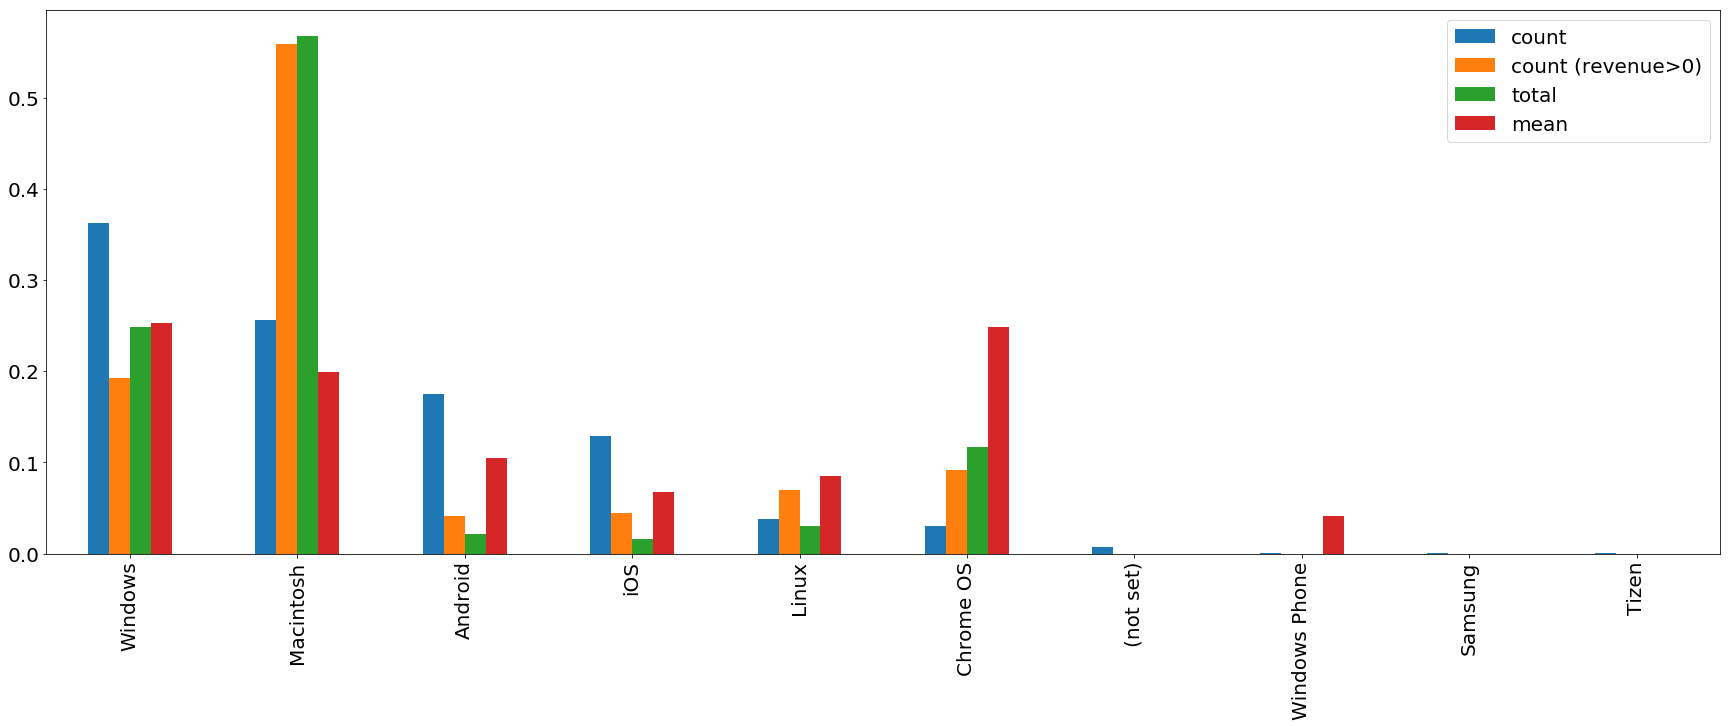

In [7]:
# device_operating_system
count_all('device_operatingSystem')

##### (2) time

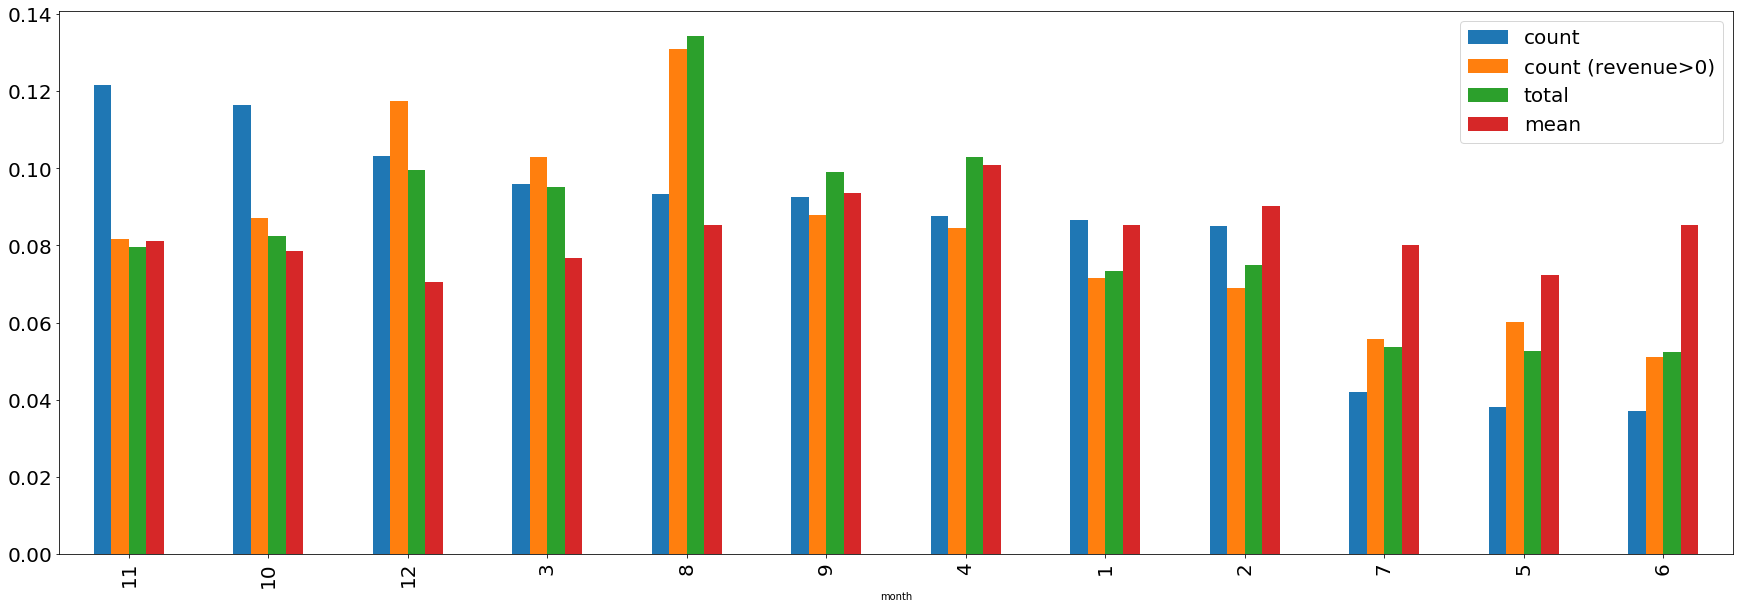

In [9]:
# month
count_all('month', n_bars = 12)

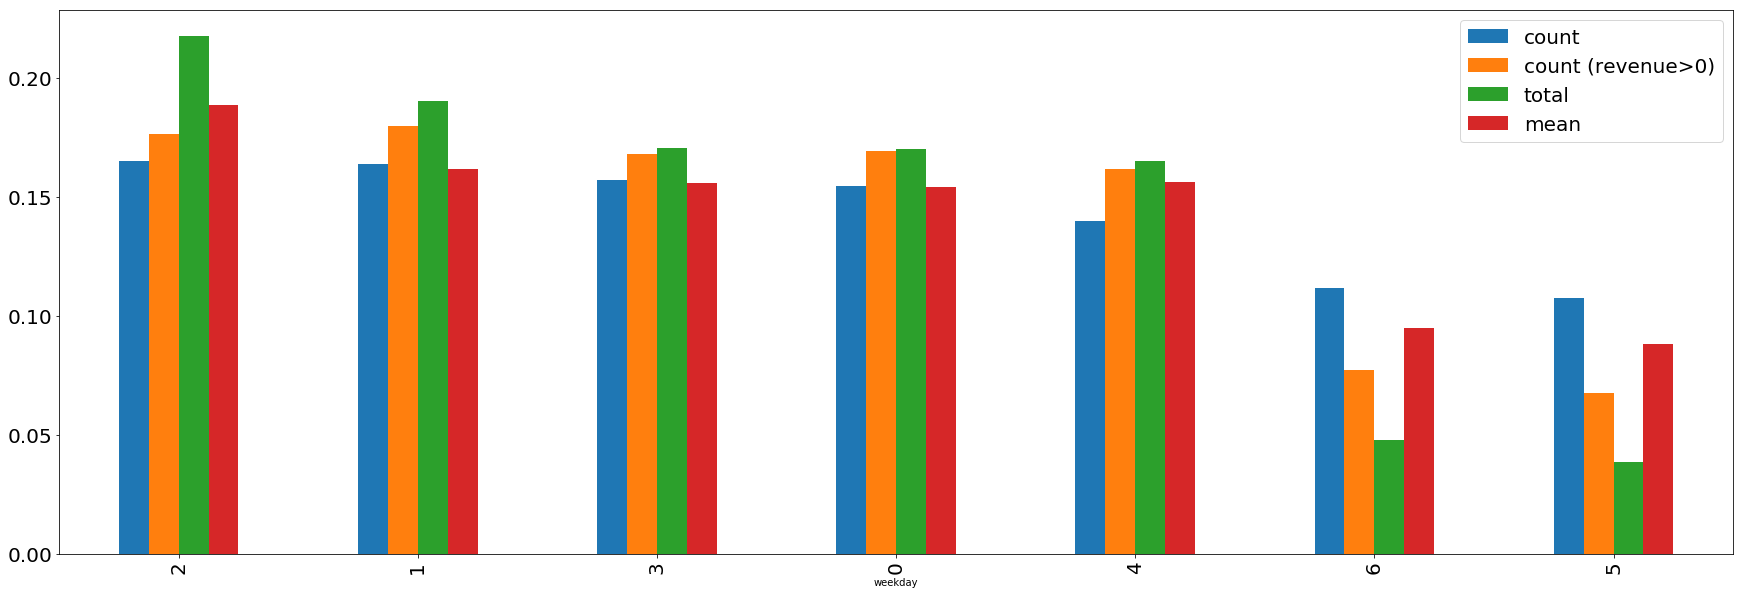

In [10]:
# weekday
count_all('weekday')

##### (3) channel grouping

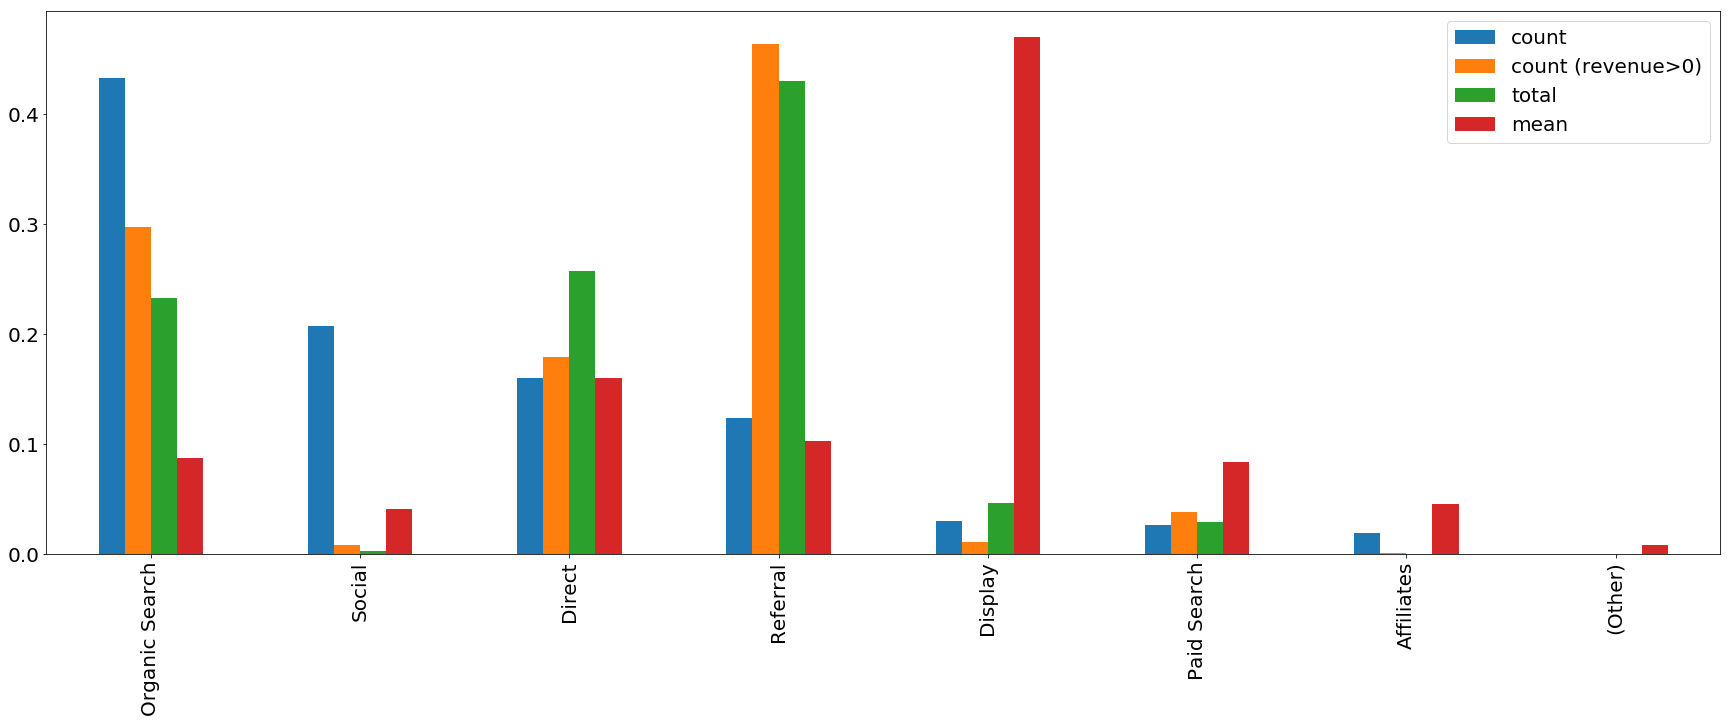

In [13]:
# channel_grouping
count_all('channelGrouping')

##### (4) totals

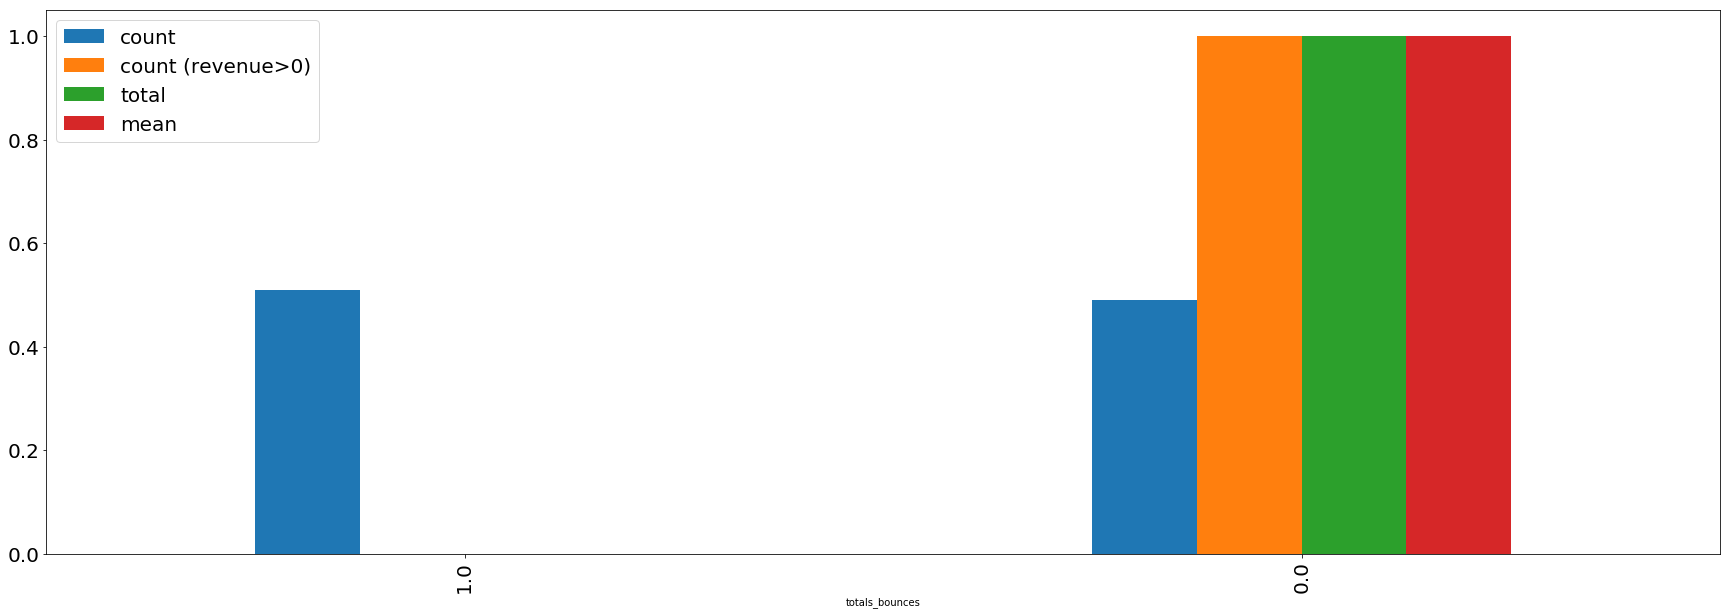

In [11]:
# total_bounces
count_all('totals_bounces')

From this we can see that if some sessions have a bounce, this session will not make any revenue. Also, about half of store visits are bounced. This may because when users donnot see the things that they are interested in will leave imediately.<br>
This result agrees with the result we found in 'channelGrouping': the reffered people are more likely to make a purchase.